學習資源：https://www.coursera.org/learn/advanced-learning-algorithms/home/welcome

## Neural networks intuition

### 神經網路與大腦  
Neural networks:  
* 生物大腦表現出更高的智力水平，人工神經網路的動機是建構模仿大腦的軟件。
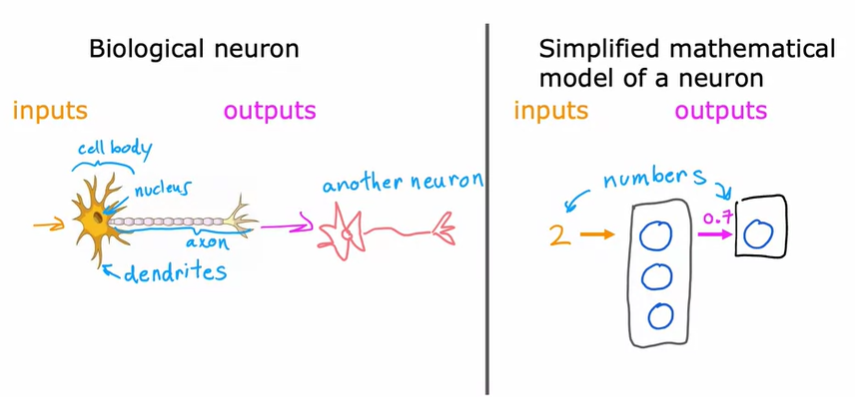


### 需求預測(Demand Prediction)  
以銷售衣服為例。  
input := x=price  output := $a=f(x)=\frac{1}{1+e^{-(wx+b)}}$  
a:=activation，神經科學中的術語，指神經元在多大程度上向下游的其他神經元發送高輸出。  
這個邏輯回歸單元可以看做是大腦中單個神經元的簡化版。神經元的作用是輸入價格x，然後它會用上方的公式計算後輸出a，a為這件衣服成為暢銷商品的概率。  
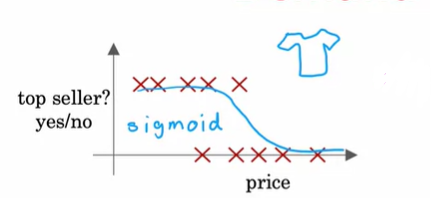  



#### probability of being a top seller  
* 實惠性
* 知名度
* 質感

層(layer)是一組神經元，以相同或相似的特徵作為輸入，接著將所有數字一起輸出。下圖共有兩層神經元，每層都可以有多個神經元。最後一層神經元稱作輸出層，輸出神經網路預測的概率。  
affordability、awareness、perceived quality、probability of being a top seller都稱為激勵值(activation)，指向下游發送的輸出值。  
輸入4個值，計算出3個新的數字，接著最後一層使用前一層輸入的三個數字去計算出一個數字，作為輸出的結果。
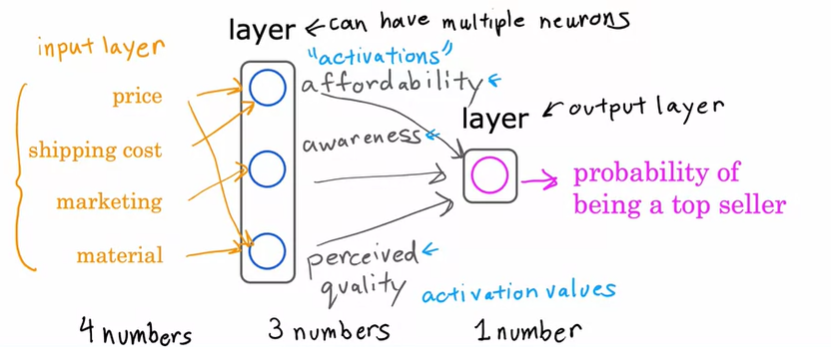  


在應用面上需要簡化上方的神經網路。  
因為當要建構大型神經網路時，無法逐一檢查神經元需要傳入哪些參數，(例如，affordability會受到價格與運費的影響，此時手動將價格與運費連向affordability，使affordability能獲取有用輸入)。  
修改成，每層中的所有神經元可以訪問前一層的所有特徵值，(例如，如果想預測affordability，並且知道所有特徵值，那需要學會忽略marketing、material，注重在與負擔能力最相關的特徵上就好)。  
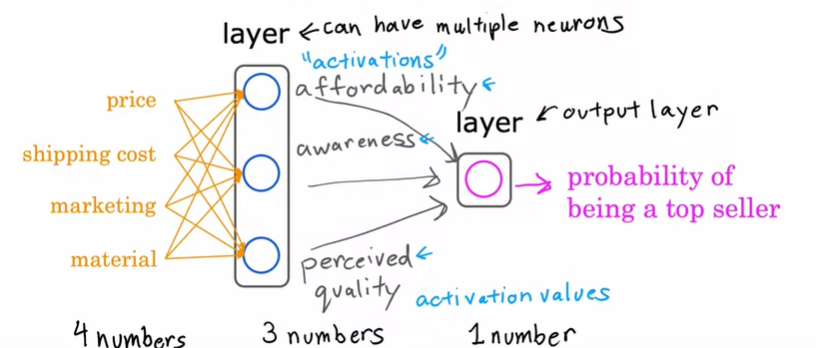

再次簡化上方的神經網路。  
將輸入的特徵組成$\vec{x}:=特徵向量$，特徵向量被送到中間層(hidden layer)，並算出3個激勵值，組成向量$\vec{a}$，送入最後的輸出層，計算後再輸出某商品成為暢銷商品的概率。  
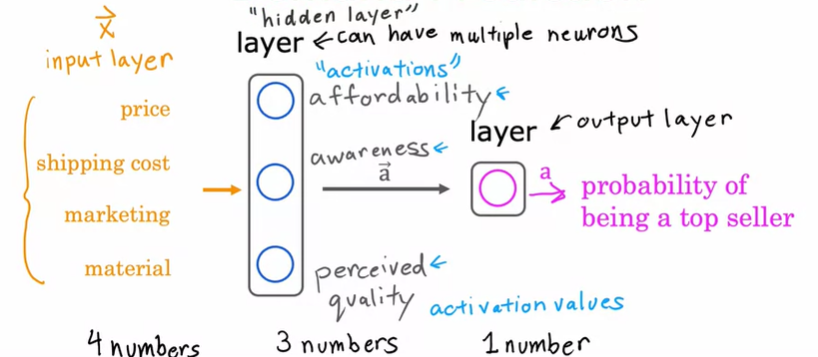

##### Multiple hidden layers  
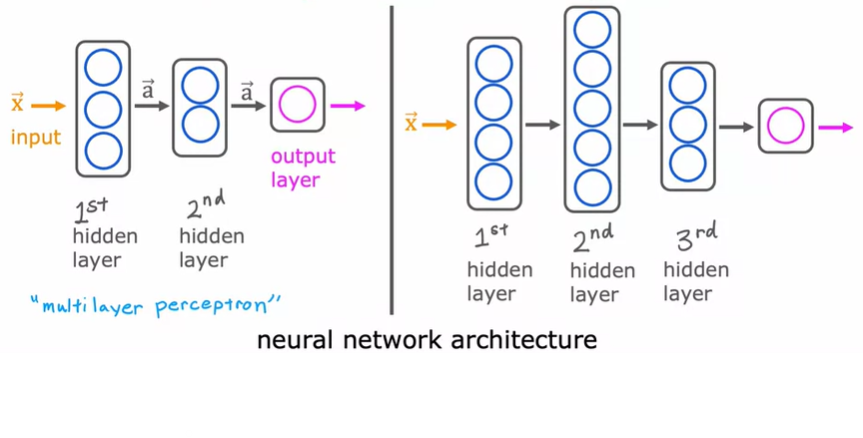

##### Example: Recognizing Images  
將像素為1000\*1000的圖片作為輸入，在電腦中呈現1000*1000的網格，每個網個中的數值都代表那個像素點的亮度，將這些像素依序排列，最終得到包含1000000個像素強度值的向量。  
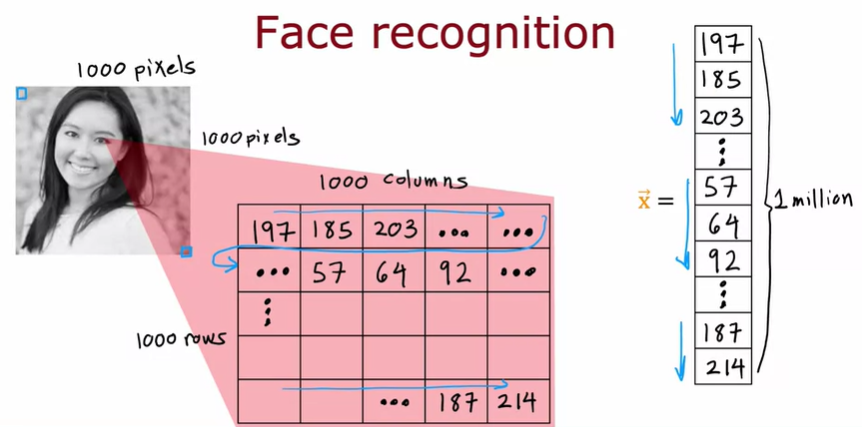  

第一層隱藏層中，神經元在圖像中尋找非常短的線條或非常短的邊緣；第二層隱藏層中，神經元在將線段組合在一起，以尋找面部的某一位置是否有眼睛；第三層隱藏層中，神經網路在聚合臉部的不同部分，嘗試檢測更大的整體面貌，接著檢測不同臉部的對應程度；輸出層嘗試確定圖片中人物的身分。  
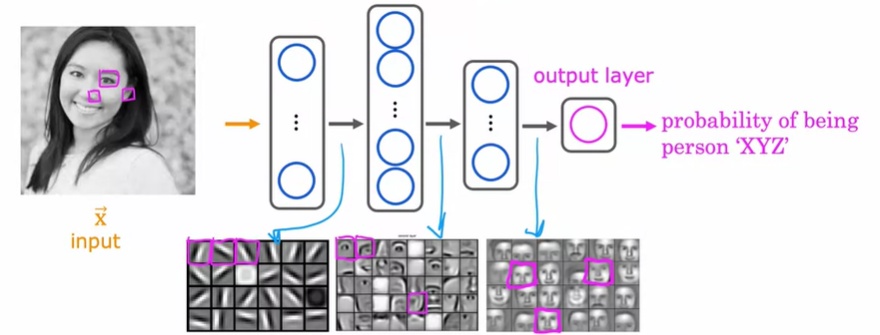

### Neural network layer  
學習如何建構一層神經元，以逐步建構大型神經網路。  
Input layer也稱作layer 0，上標$[1]$表示第一層神經網路，下標表示第一個隱藏值。傳入特徵向量$\vec{x}=\left[
\begin{array}{c}
    197 \\
    184 \\
    136 \\
    214
\end{array}
\right]$進第一層中進行運算後輸出激勵向量$\vec{a}^{[1]}=\left[
\begin{array}{c}
    0.3 \\
    0.7 \\
    0.2
\end{array}
\right]$，$g(z)$是邏輯函數。  
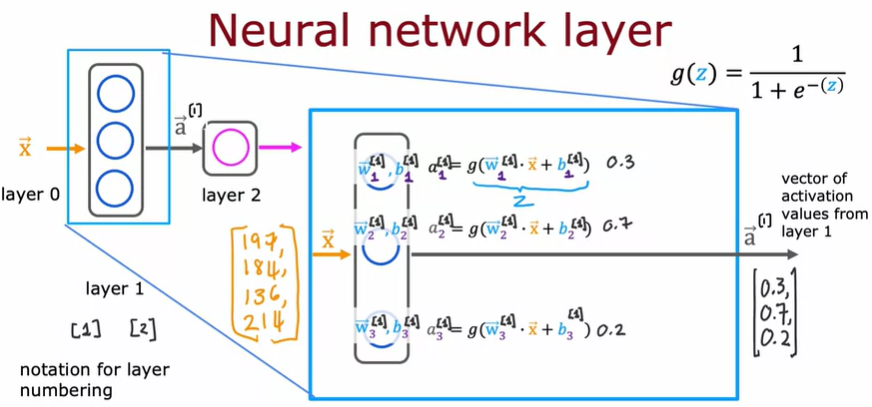  

激勵向量$\vec{a}^{[1]}=\left[
\begin{array}{c}
    0.3 \\
    0.7 \\
    0.2
\end{array}
\right]$成為layer 2的輸入，計算後假設得到0.84作為結果，因為輸出層只有一個神經元，因此這個輸出只是一個數字，而非向量，因此輸出$a^{[2]}=0.84$。
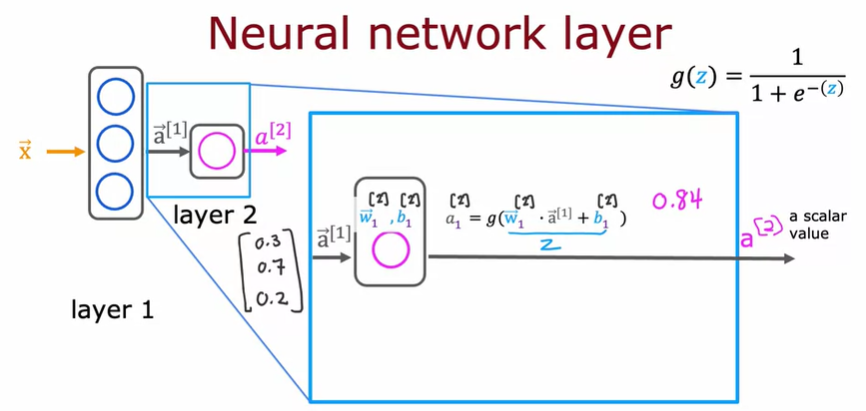  

得到0.84作為輸出，藉由選擇的閥值去分類，$\hat{y}為1或0$。  
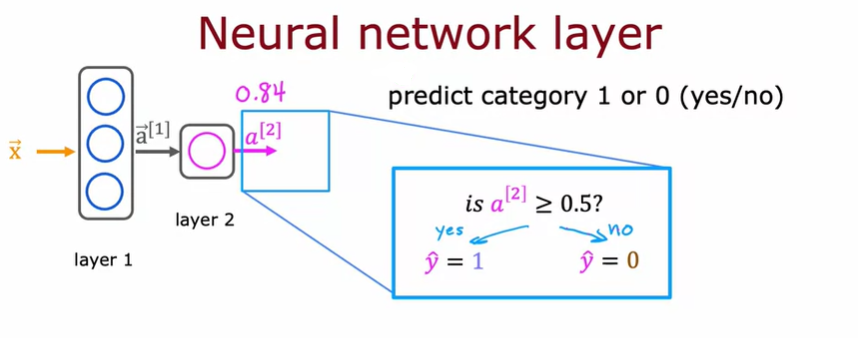  



#### 更加複雜的神經網路範例  
以下為一個四層神經網路，不包含第0層。  
$\vec{x}=\vec{a}^{[0]}$，第三層輸入$\vec{a}^{[2]}$，經過運算後的輸出值是$\vec{a}^{[3]}=\left[
\begin{array}{c}
    a_1 \\
    a_2 \\
    a_3
\end{array}
\right]$  
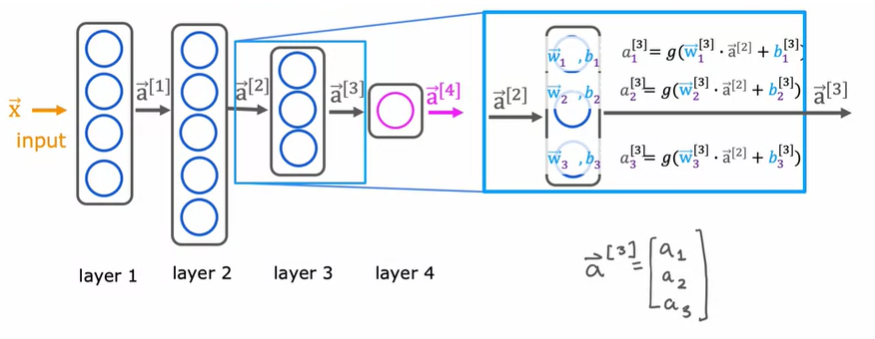  
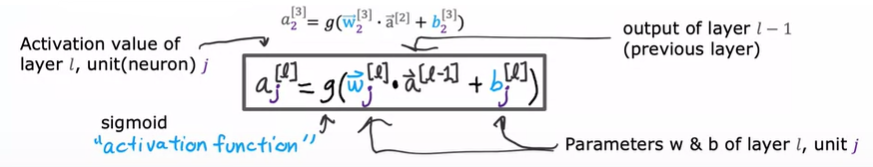

### Inference: making predictions (正向傳播，forward propagation)  
#### Handwritten digit recognition  

有兩個隱藏層的神經網路，加上輸出層，共三層。  
第一個隱藏層有25個神經元，第二個隱藏層有15個神經元，第三層，輸出層有1個神經元，輸出辨識結果是1的可能性有多大?  
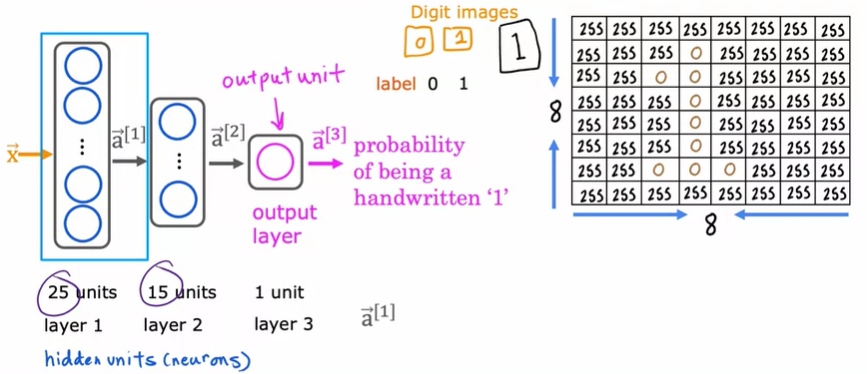  
第一層計算$\vec{x}→\vec{a}^{[1]}$，$\vec{a}^{[1]}=\left[
\begin{array}{c}
    g(\vec{w_1}^{[1]}．\vec{x}+b_1^{[1]}) \\
    ⋮ \\
    g(\vec{w_{25}}^{[1]}．\vec{x}+b_{25}^{[1]})
\end{array}
\right]=\left[
\begin{array}{c}
    g(\vec{w_1}^{[1]}．\vec{a^{[0]}}+b_1^{[1]}) \\
    ⋮ \\
    g(\vec{w_{25}}^{[1]}．\vec{a^{[0]}}+b_{25}^{[1]})
\end{array}
\right]$  
第二層計算$\vec{a}^{[1]}→\vec{a}^{[2]}$，$\vec{a}^{[2]}=\left[
\begin{array}{c}
    g(\vec{w_1}^{[2]}．\vec{a^{[1]}}+b_1^{[2]}) \\
    ⋮ \\
    g(\vec{w_{15}}^{[2]}．\vec{a^{[1]}}+b_{15}^{[2]})
\end{array}
\right]$  
$第三層計算\vec{a}^{[2]}→\vec{a}^{[3]}，\vec{a}^{[3]}=[g(\vec{w_1^{[3]}}．\vec{a}^{[2]}+b_1^{[3]})] \rightarrow is　a_1^{[3]}\geq0.5?
\left\{
\begin{aligned}
yes:=\hat{y}=1 \\
no:=\hat{y}=0 \\
\end{aligned}
\right.$

### Inference in Code  
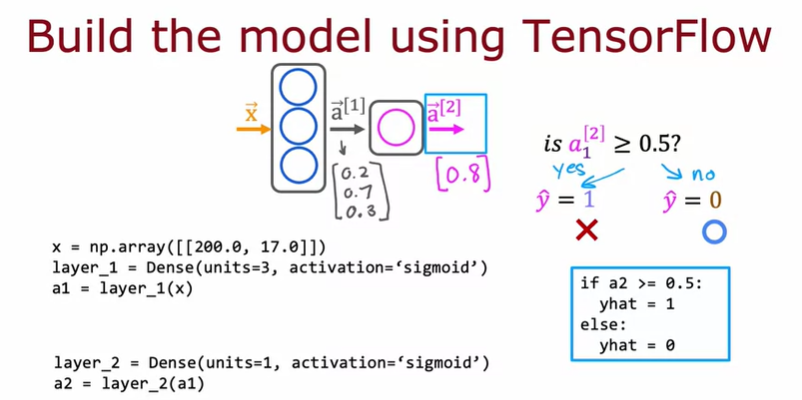  
TensorFlow習慣將numpy傳遞進入的資料改成自己的格式，因此如果希望改回numpy的格式，使用```a1.numpy()```轉換。


#### Data in TensorFlow  
用2D array的方式儲存。
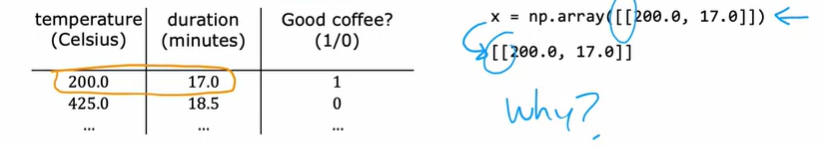

In [7]:
import numpy as np
x1 = np.array([[200,17]]) # one row, two columns(1*2)
x2 = np.array([[200],[17]]) # two row, one columns(2*1)
print("x1:\n",x1)
print("x2:\n",x2)

x =  np.array([200,17]) # 1D vector
print("x:\n",x)

x1:
 [[200  17]]
x2:
 [[200]
 [ 17]]
x:
 [200  17]


處理線性回歸或邏輯回歸時，使用如上方程式變數x的一維向量表示輸入特徵x。  
而在TensorFlow中，慣例使用矩陣表示數據，因為TensorFlow主要是為了處理大量數據，而使用矩陣使TensorFlow在內部提高計算效率。  

In [ ]:
layer_1 = dense(units=3, activation='sigmoid')
a1 = layer_1(x)
a1
a1.numpy()

#### Building a neural network  
定義好第一層與第二層後，取代手動將資料由第一層傳入第二層中，使用TensorFlow中的Sequential函式將第一層與第二層串連在一起。  
``` python
layer_1 = Dense(units=3, activation='sigmoid')
layer_2 = Dense(units=1, activation='sigmoid')
model = Sequential([layer_1, layer_2])
```
通常會改寫成：
``` python
model = Sequential([
    Dense(units=3, activation='sigmoid'), 
    Dense(units=1, activation='sigmoid')])
```
程式架構:  
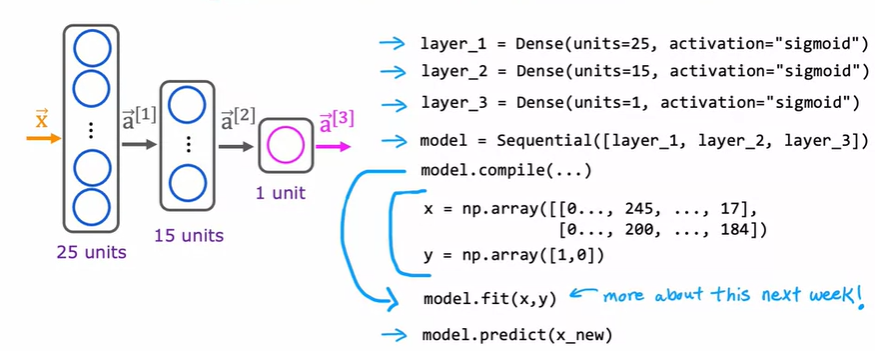


### forward propagation in a single layer  
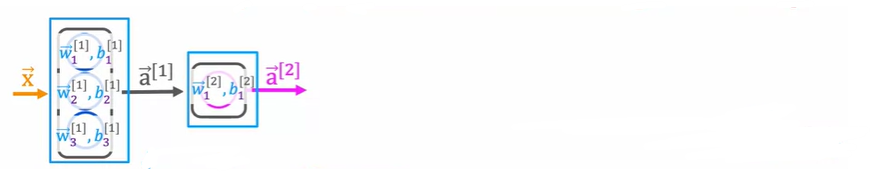  
$\vec{w_1}^{[1]}=\left[
\begin{array}{c}
    1 \\
    2
\end{array}
\right]$　
$\vec{w_2}^{[1]}=\left[
\begin{array}{c}
    -3 \\
    4
\end{array}
\right]$　
$\vec{w_3}^{[1]}=\left[
\begin{array}{c}
    5 \\
    -6
\end{array}
\right]$  
$b_1^{[1]}=-1$　　　$b_2^{[1]}=1$　　　　$b_3^{[1]}=2$

In [ ]:
x = np.array([200,17])

# a_1^{[1]}=g(\vec{w}_1^{[1]}．\vec{x}+b_1^{[1]})
w1_1 = np.array([1,2])
b1_1 = np.array([-1])
z1_1 = np.dot(x1_1,x)+b1_1
a1_1 = sigmoid(z1_1)

# a_2^{[1]}=g(\vec{w}_2^{[1]}．\vec{x}+b_2^{[1]})
w1_2 = np.array([-3,4])
b1_2 = np.array([1])
z1_2 = np.dot(x1_2,x)+b1_2
a1_2 = sigmoid(z1_2)

# a_3^{[1]}=g(\vec{w}_3^{[1]}．\vec{x}+b_3^{[1]})
w1_3 = np.array([5,-6])
b1_3 = np.array([2])
z1_3 = np.dot(x1_3,x)+b1_3
a1_3 = sigmoid(z1_3)

a1 = np.array([a1_1,a1_2,a1_3])

# a_1^{[2]}=g(\vec{w}_1^{[2]}．\vec{a}^{[1]}+b_1^{[2]})
w2_1 = np.array([-7,8,9])
b2_1 = np.array([3])
z2_1 = np.dot(x2_1,a1)+b2_1


In [15]:

W = np.array([
              [1,-3,5],
              [2,4,-6]])
b = np.array([-1,1,2])
a_in = np.array([-2,4])

dense函數的目的是將前一層的激勵值、組合成array的w值(權重)、b參數作為輸入，接著輸出當前層的激勵值，以便傳入下一層。  
<font color="red">※大寫字母代表矩陣，小寫代表向量</font>

In [16]:
def dense(a_in,W,b):
    units = W.shape[1] # :=3, column數
    a_out = np.zeros(units) # 將a設為由0組成的數組，其元素數量與單位數量一樣多 :=[0,0,0]
    for j in range(units): # 由0開始索引
        w = w[:,j] # 拉出矩陣中的第j列, 第一次拉出w1_1, 第二次拉出w1_2
        z = np.dot(w,a_in)+b[j]
        a_out[j] = g(z) # g()定義在dense()外面
    return a_outA

sequential目的是按順序將每層串在一起，以便在神經網路實現前瞻傳播。  
假設有四層，輸入特徵x，接著計算a1到a4，且a4的值等同於輸出值。

In [19]:
def sequential(x):
    a1 = dense(x,W1,b1)
    a2 = dense(a1,W2,b2)
    a3 = dense(a2,W3,b3)
    a4 = dense(a3,W4,b4)
    f_x = a4
    return f_x

#### How neural networks are implemented efficiently  
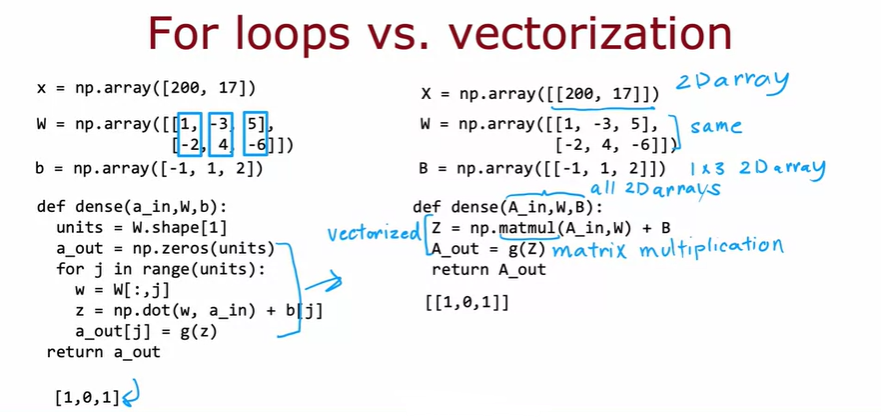

### TensorFlow implementation  

In [ ]:
!pip install tensorflow

  Using cached tensorflow-2.16.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.64.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.3 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.4.1-py3-none-any.whl

In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 第一步:指定模型
model = Sequential([ # 按順序串接三層
    Dense(units=25, activation='sigmoid'),
    Dense(units=15, activation='sigmoid'),
    Dense(units=1, activation='sigmoid'), # 輸出層
])

from tensorflow.keras.losses import BinaryCrossentropy

#第二步:使用特定的損失函數編譯模型，在指定了損失函數後，同時代表定義了訓練神經網路的成本函數
# 讓tensorflow編譯模型需要指定要使用的損失函數
model.compile(loss=BinaryCrossentropy())

#第三步:訓練模型
# 調用fit函式，目的是告訴tensorflow使用上一行中指定的成本函數的損失去將串接的model fit到數據集X、Y中
# epochs指進行梯度下降時要下降幾次
model.fit(X,Y,epochs=100)


ModuleNotFoundError: No module named 'tensorflow'

#### Training Details  
**模型訓練步驟**  
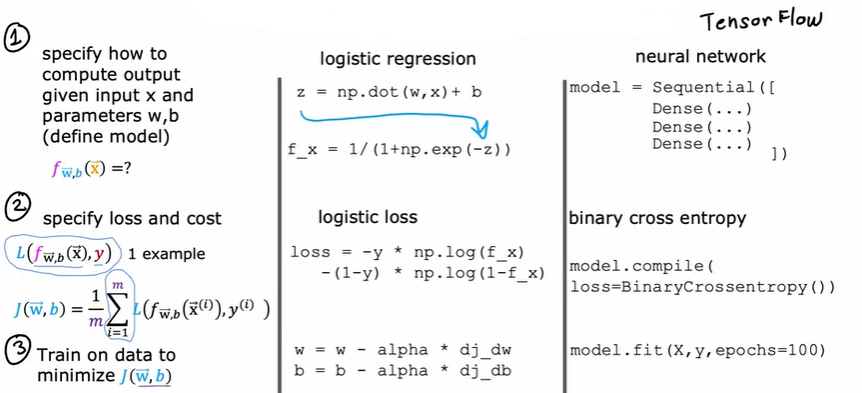  


1. 建立模型
   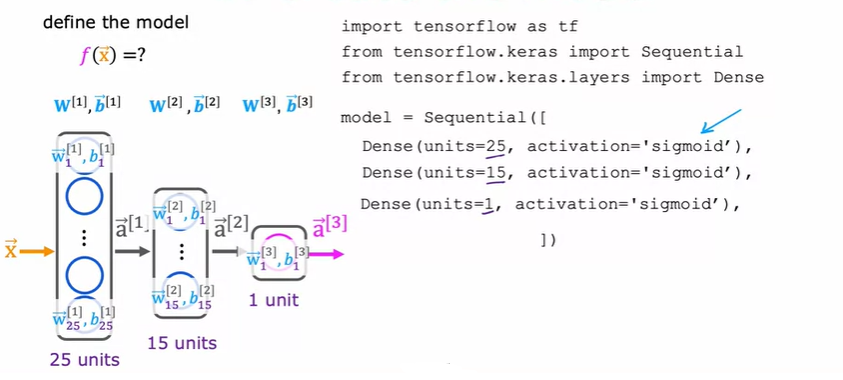

2. 指定損失函數，同時定義了成本函數  
   y:=目標標籤  
   f(x):=神經網路的輸出  
   邏輯回歸的損失函數在tensorflow中也稱，binary cross-entropy loss function。  
   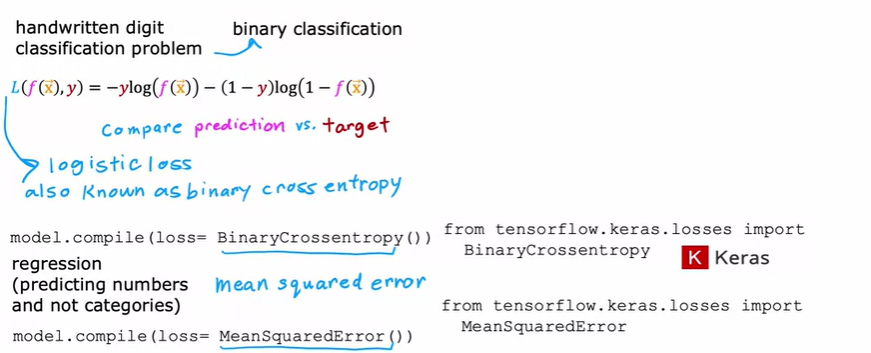
   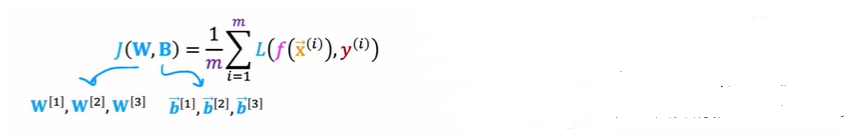
   可自由尋找希望使用的損失函數，例如，為單個訓練指定損失時，使用平方誤差損失函數，取所有(m個)訓練樣本的平均值。

3. 訓練模型 梯度下降  
   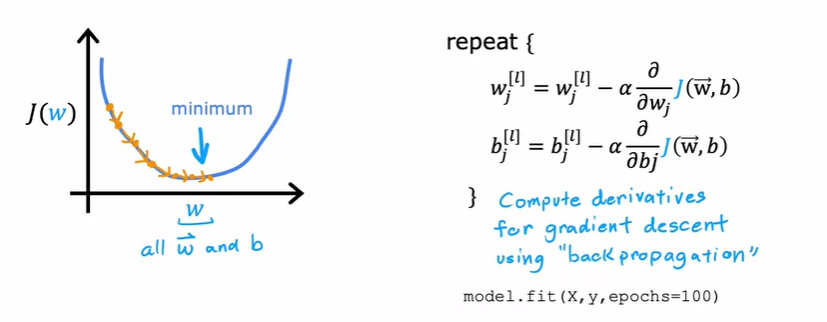